# Simple Linear Regression - Supervised Model

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4) # Notebboktaki tüm görselleri 10,6 boyutuna getirir.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input = explanatory variable

dependent variable = target  = label = output = response variable

rows = observation, sample

**features** = TV + radio + newspaper

**target** = sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe() 
# std, meanden büyük veya meane yakın bir değerse datamızın genelinde bir outler problemi olduğuna dair bize çıkarım sağlar

# "min" ile %25'lik ilk çeyrek arasında ve/veya %75'lik 3.çeyrek ile max arasında uçurum varsa datamızın genelinde 
# olmasa da sınırlı sayıda outlier değerler olabileceğine dair çıkarım sağlar

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# 4 öğesi bulunan bir listede 1 tane outlier değerin std ve mean değerlerini nasıl değiştirdiğini gözlemleyebiliyoruz
print("mean :", np.mean([100, 110, 120, 400]))
print("std  :", np.std([100, 110, 120, 400]))

mean : 182.5
std  : 125.77261228105267


In [6]:
# outlier değerin std'yı mean'e yaklaştırıyor.
print("mean :", np.mean([100, 110, 120, 700]))
print("std  :", np.std([100, 110, 120, 700]))

mean : 257.5
std  : 255.57533136044253


In [7]:
# outlier değer std'yı mean'den büyük yapıyor.
print("mean :", np.mean([100, 110, 120, 900]))
print("std  :", np.std([100, 110, 120, 900]))

mean : 307.5
std  : 342.153109002388


<AxesSubplot:xlabel='TV', ylabel='Count'>

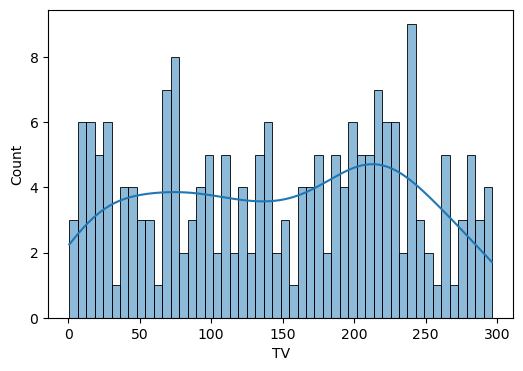

In [8]:
sns.histplot(df.TV, bins=50, kde=True)

# Histplot ve boxplot ile outlier değerlerin olup olmadığı kontrol ediyoruz. 

<AxesSubplot:xlabel='TV'>

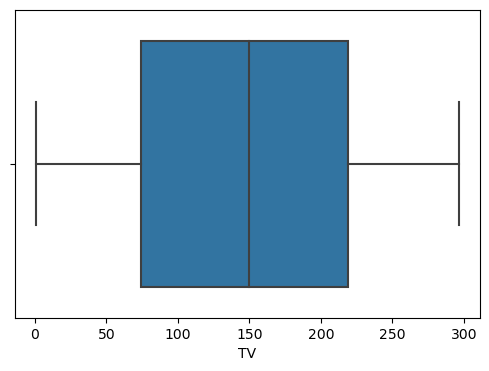

In [9]:
sns.boxplot(df.TV)

# Histplot ve boxplot ile outlier değerlerin olup olmadığı kontrol ediyoruz.

# ML'de bir gözlem gerçek dünya verisi ise o gözleme outlier yaklaşımında bulunmuyoruz. ML'deki outlier yaklaşımı
# elinizdeki outlier veriler eğitim için yeterli mi değil mi sorusuna cevap aramakla ifade edilir. Normal dağılımın çok
# dışında kalmış veya boxplot whisker'larının dışında kalan değerlerin sayısı üzerinden outlier olup olmadıkları yorumlanır
# Bu sayı az ise eğitim için yeterli veri yok denip outlier yaklaşımında bulunulabilir. 

## Create new independent variable (feature)

In [10]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
# feature engineering yaparak başka gözlemlerden yeni bir gözlem elde ediyoruz.

In [11]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [12]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

# target'ımızı df'in sonuna konumlandırarak heatmap, pairplot gibi görsellerin okunuşu kolaylaştırıyoruz.

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


## Which feature is more suitable for linear regression?

In [13]:
df["sales"].corr(df["TV"])

# simple linear regression'da feature ile target arasında anlamlı bir ilişki varsa bu data linear regression için uygundur

0.7822244248616066

In [14]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 60, 65, 70, 75, 80]}
df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,60
2,32,65
3,33,70
4,34,75
5,35,80


In [15]:
df2.temperature.corr(df2.ice_cream_sale)

# Korelasyon featurlar arasındaki ilişkiyi gösterir. Featurların birlikte azalıp/artma veya biri azalırken/artarken
# diğerinin artıp/azaldığına dair bize çıkarım sağlar.

# correlasyon yukardaki örnektede olduğu gibi hava sıcaklığındaki 1 derece artışın dondurma satışlarını ne kadar
# etkilediğine (artırıp-azalttığına) dair bir çıkarım sağlamaz. Sadece hava sıcaklığı artarsa dondurma satışıda artar 
# bilgisi verir.

# 1 derecelik veya daha fazla artışlar/azalışlar ile dondurma satışlarının ne kadar artacağına/azalacağına regression 
# cevap verir.

0.989743318610787

In [16]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 51, 53, 54, 55, 56]}
df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,51
2,32,53
3,33,54
4,34,55
5,35,56


In [17]:
df2.temperature.corr(df2.ice_cream_sale)

# yukardaki ilk df'te 1 derecelik artış dondurma satışlarını 5 kg artırıyorken corr=0.9821 çıktı.
# 2. df'de 1 derecelik artış dondurma satışlarını 1 kg artırıyorken corr=0.99 çıktı.
# gördüğünüz gibi 2 farklı senaryo içinde corr değerleri nerdeyse aynı çıktı

0.9921609337929049

In [18]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")
    
# Simple linear regression özelinde feature ile target arasında anlamlı-yüksek bir corr varsa bu data lnear regression 
# için daha uygundur. Burada hangi featuran simple linear regression için daha uygun olduğunu tespit ediyoruz.

corr between sales and TV          :  0.7822244248616066
corr between sales and radio       :  0.5762225745710552
corr between sales and newspaper   :  0.22829902637616534
corr between sales and total_spend :  0.8677123027017418


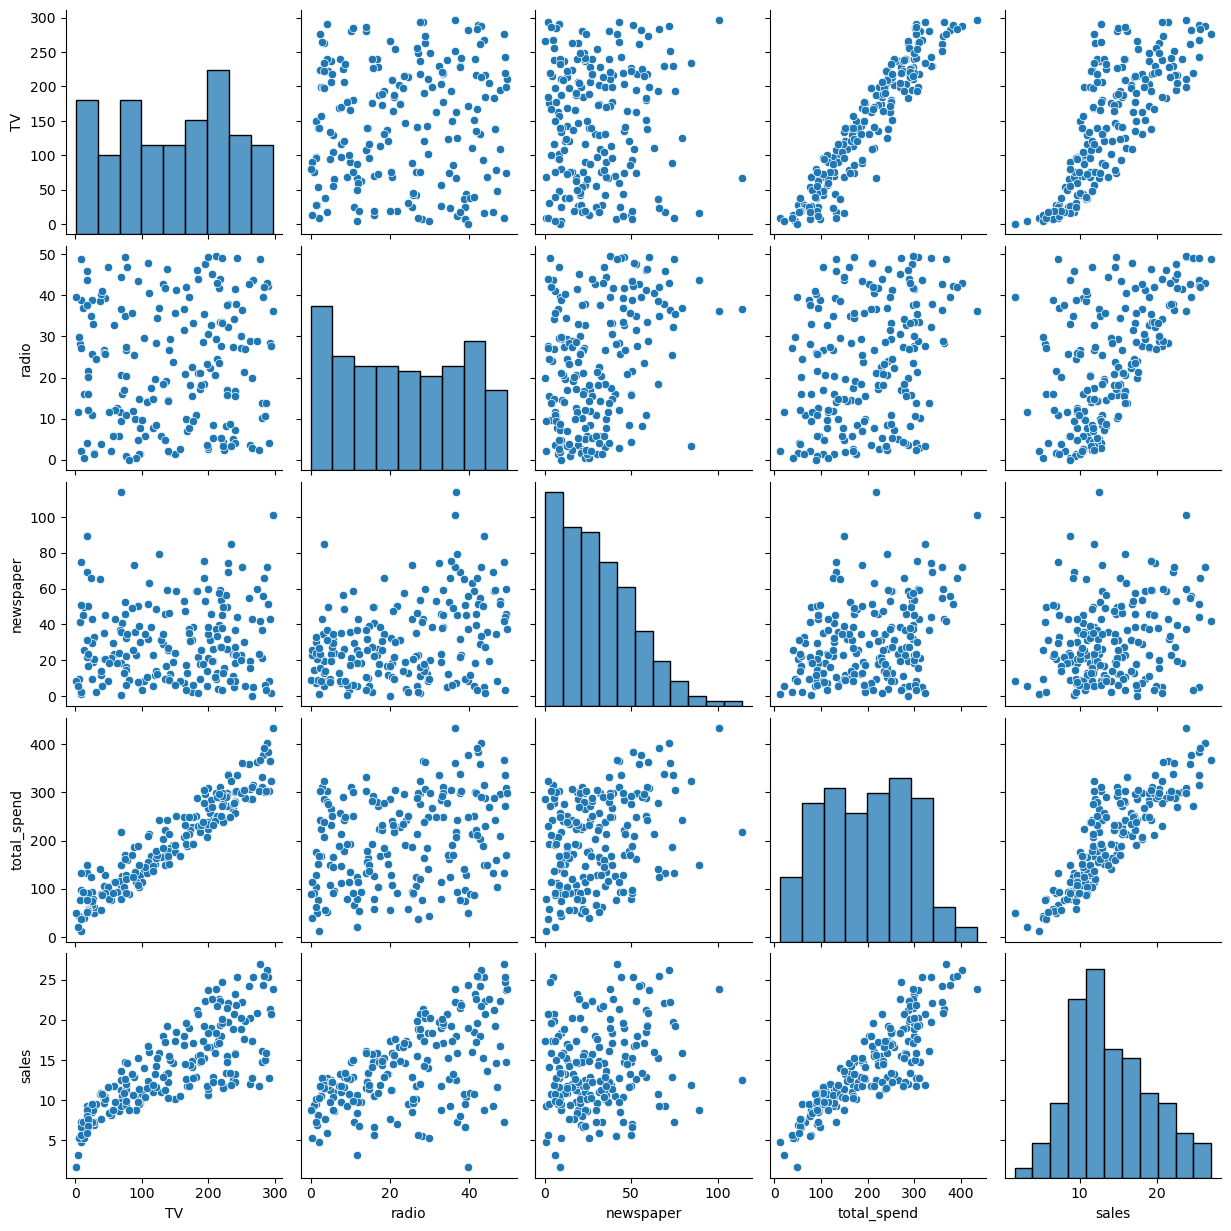

In [19]:
sns.pairplot(df)
#scatter plot üzerinden de en yüksek corr'un total spend ile spends arasında olduğu görülebiliyor.

# target df'in en sonunda konumlandırılarak en alt satırda target ile featurlar arasındaki corr değerlendirmesi daha kolay
# yapılabiliyor.

In [20]:
df.corr()

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


<AxesSubplot:>

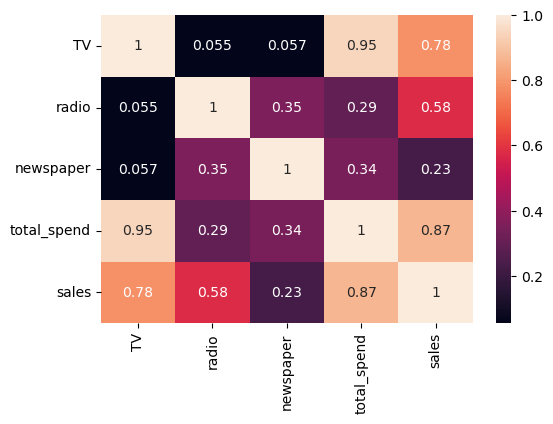

In [21]:
sns.heatmap(df.corr(), annot=True)

# target df'in en sonunda konumlandırılarak en alt satırda target ile featurlar arasındaki corr değerlendirmesi daha kolay
# yapılabiliyor.

In [22]:
df = df[["total_spend", "sales"]]
df

# Target ile en anlamlı corr total spend arasında olduğundan total spend'in simple linear regression için daha uygun olduğu
# tespit ettik. Bu kapsamda yeni df'mimizi total spend ve sales ile yeniden kuruyoruz.

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


## Plotting the relationship between independent variable and dependent variable 

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

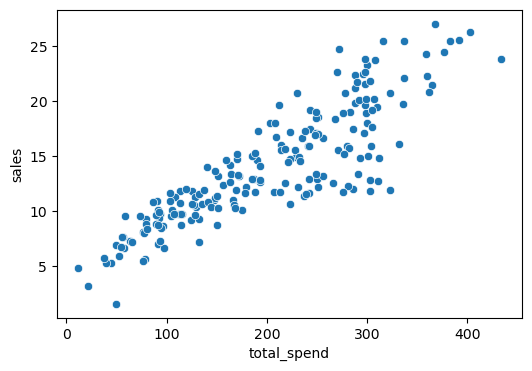

In [23]:
sns.scatterplot(x ="total_spend", y = "sales", data=df)

# scatter plot anlamlı bir corr olduğunu görüyoruz.

## Correlation between independent variable and dependent variable

In [24]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017418

In [25]:
df["total_spend"].corr(df["sales"])

0.8677123027017419

## Coefficient of determination (R2)

In [26]:
R2_score = corr**2
R2_score

# R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
# Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir.


# Aşağıdaki örnekte 2+1 ev ile 3+1 ev arasındaki 10 bin USD'lik fiyat farkının sadece 3 bin USD'si oda sayısından 
# kaynaklanıyorsa oda sayısı featurenın bize sağladığı bilgi %30'dur. Eğer evin cephe, kat, ısınma sistemi, bina yaşı, 
# metro/otobüs duraklarına, merkeze yakınlık vb. gibi bilgileri de biliyor olsaydık bu oran daha da artacak ve ev fiyatını
# daha doğru bir şekilde tahmin edebilecektik.

0.7529246402599592

A house price ----> 50.000 USD

B house price ----> 60.000 USD


A house ----> 2+1

B house ----> 3+1


If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

## Linear Regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

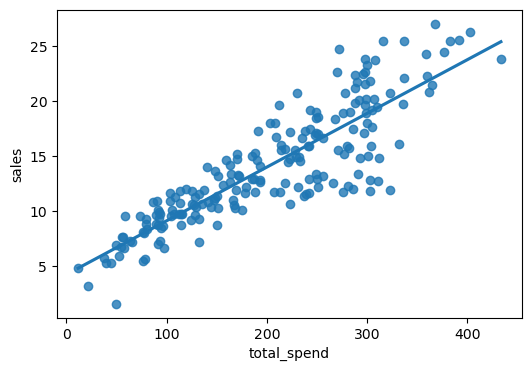

In [27]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)

# seabornun regressionplotunu kullanarak bu data için best linemızı çiziyoruz.

# y_pred üzerinden best line aşağıda çiz

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [28]:
# y_pred = b1X + b0

In [29]:
X = df["total_spend"]
y = df["sales"]

## Determination of coefficients (slope and intercept)

In [30]:
np.polyfit(X, y, deg=1)

# numpy kütüphanesinden polyfit fonksiyonunu kullanarak featurların katsayılarını tespit ediyoruz.
# polinomial regressionun 1. derecesi linear regression olduğunda degree=1 seçiyoruz

array([0.04868788, 4.24302822])

In [31]:
slope, intercept = np.polyfit(X, y, deg=1)

# slope feature katsayısı
# intercept X=0 iken y'nin aldığı değeri gösterir.

In [32]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.048687879319048145
intercept: 4.2430282160363255


## Why do we use the least squares error method to find the regression line that best fits the data?

In [33]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [34]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [35]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [36]:
y_pred = b1*X + b0

In [37]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2

# gerçek değerleri, tahmin edilen değerleri, ve residualler ile residual üzerinden hesaplanan error metriclerinin
# hesaplanmasında kullanılan LSE ve ABS değerlerini aynı df'de görüntülüyoruz.

# LSE residuallerin karesini aldığından yapılan kötü tahminleri cezalandırıken ABS mutlak değerlerini aldığından 
# cezalandırma yapmaz.

# Residuallerin karesini alıp gözlem sayısına böldüğümüzde gözlem bazında ortalama yapılan hatanın karesini verir.
# Yapılan kötü tahminleri cezalandırdığından LSE üzerinden elde edilen metricler yorumlamada çokca tercih edilir.
# Modelin kötü tahminler yaptığına dair bize insightler verir.

# Residuallerin mutlak değerini alıp gözlem sayısına böldüğümüzde gözlem bazında ortalama yapılan hatanın mutlak değerini
# verir. Yapılan kötü tahminleri cezalandırmadığından ABS üzerinden elde edilen metricler yorumlamada çok tercih edilmez.

# ABS üzerinden elde ettiğimiz metric ile LSE üzerinden elde ettiğimiz metric arasında uçurum varsa modelin çok kötü
# tahminler yaptığını anlaya biliriz. 

# Bunların detayına  multiple linear regressionda değineceğiz



,actual,predicted,residual,LSE,ABS
0,22.1,20.655712,1.444288,2.085967,1.444288
1,10.4,10.518896,-0.118896,0.014136,0.118896
2,9.3,10.689303,-1.389303,1.930164,1.389303
3,18.5,16.478292,2.021708,4.087302,2.021708
4,12.9,16.414998,-3.514998,12.355211,3.514998
...,...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098,0.645057
196,9.7,9.462369,0.237631,0.056469,0.237631
197,12.8,13.625183,-0.825183,0.680926,0.825183
198,25.5,23.318939,2.181061,4.757026,2.181061


In [38]:
df_2.residual.sum().round()

# Elde ettiğimiz best fit line sonrası yaptığımız tahminler ile gerçek değerler arasındaki farkların (residullerin) toplamı
# herzaman 0 olur.

0.0

## Prediction with simple linear regression

In [39]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

# 0 ile 500 arasında 100 farklı harcama tutarı elde etmek için linspace fonk. kullanıyoruz. Ve bu değerleri potential_spend
# değişkenine atıyoruz.

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [40]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin

# potential_spend değişkenini b1 katsayısı ile çarpıp herbilrine b0 ilave ederek tahmnilerimizi aıyoruz.
# Bu işlemleri manuel olarak yapmamaıza gerek yok sklerarn bunların hepsini otomatik olarak yapacak

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21